In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('.\data\PatientInfo.csv')
popinfo = pd.read_csv('.\data\Population.csv')
df = pd.merge(df, popinfo, on='province')

In [3]:
df['symptom_onset_date'] = pd.to_datetime(df['symptom_onset_date'], format = '%Y-%m-%d', errors = 'coerce')
# df['symptom_onset_date'] = pd.to_datetime(df['symptom_onset_date'])
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format = '%Y-%m-%d')
df['released_date'] = pd.to_datetime(df['released_date'], format = '%Y-%m-%d')
df['deceased_date'] = pd.to_datetime(df['deceased_date'], format = '%Y-%m-%d')
print(df.head(5))

   patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaT   
2  contact with patient  2002000001             17                NaT   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaT   

  confirmed_date released_date deceased_date     state  \
0     2020-01-23    2020-02-05           NaT  released   
1     2020-01-30    2020-03-02           NaT  released   
2     2020-01-30    2020-0

In [4]:
print(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   patient_id                5165 non-null   int64         
 1   sex                       4043 non-null   object        
 2   age                       3785 non-null   object        
 3   country                   5165 non-null   object        
 4   province                  5165 non-null   object        
 5   city                      5071 non-null   object        
 6   infection_case            4246 non-null   object        
 7   infected_by               1346 non-null   object        
 8   contact_number            791 non-null    object        
 9   symptom_onset_date        689 non-null    datetime64[ns]
 10  confirmed_date            5162 non-null   datetime64[ns]
 11  released_date             1587 non-null   datetime64[ns]
 12  deceased_date       

                          count  percentage
patient_id                    0        0.00
sex                        1122       21.72
age                        1380       26.72
country                       0        0.00
province                      0        0.00
city                         94        1.82
infection_case              919       17.79
infected_by                3819       73.94
contact_number             4374       84.69
symptom_onset_date         4476       86.66
confirmed_date                3        0.06
released_date              3578       69.27
deceased_date              5099       98.72
state                         0        0.00
province_population_in_M      0        0.00


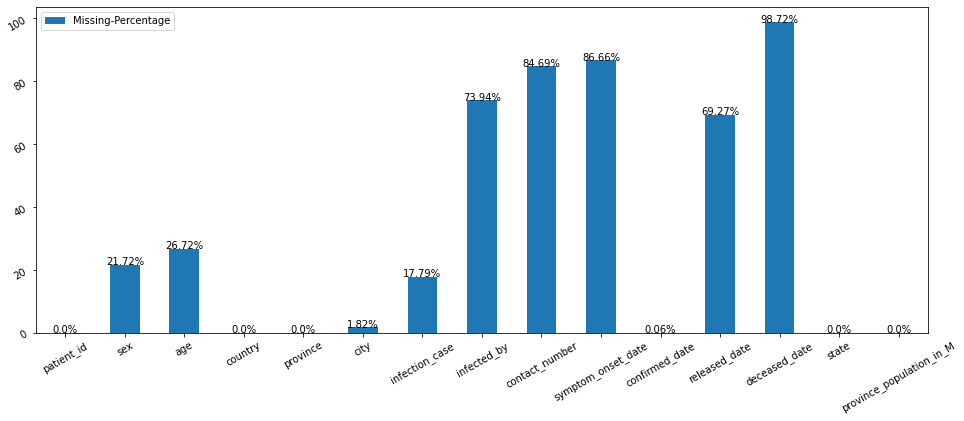

In [5]:
### 1. Know Your Data ###
# df.info()
# df.describe()

# missing values #
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

# visualize missing value#
barchart = missing_df.plot.bar(y='percentage', figsize = (16,6), label = 'Missing-Percentage')
barchart.tick_params(labelrotation=30)
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%', horizontalalignment = 'center')

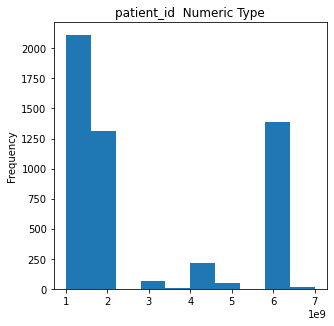

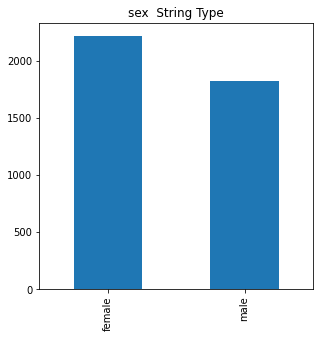

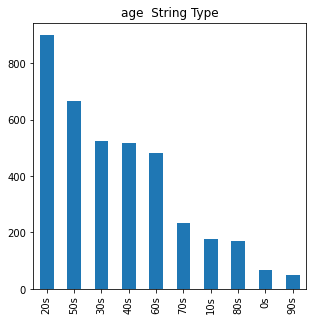

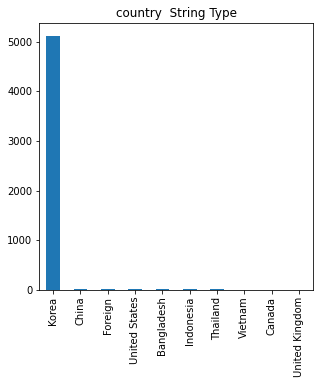

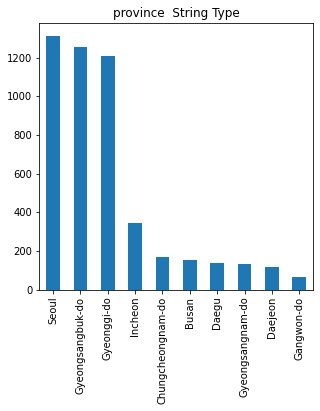

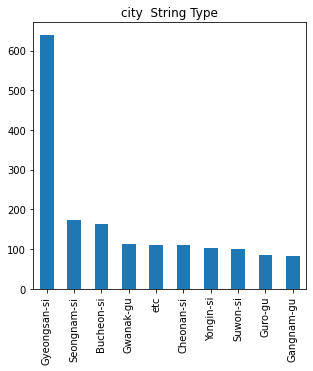

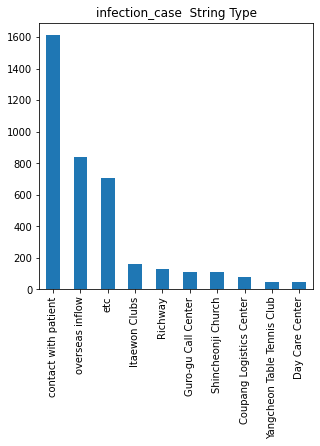

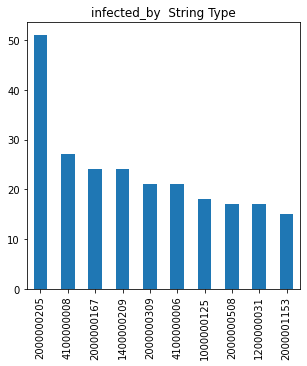

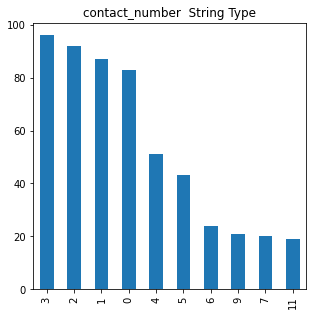

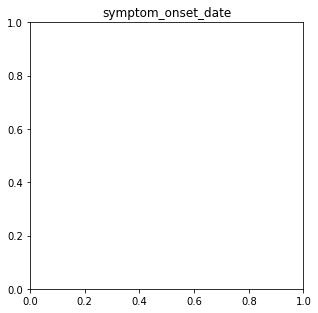

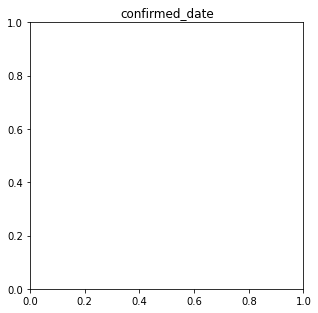

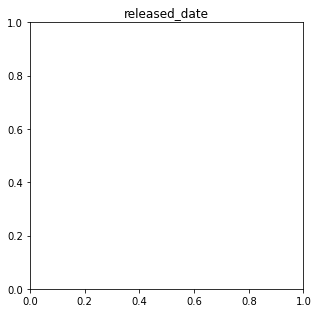

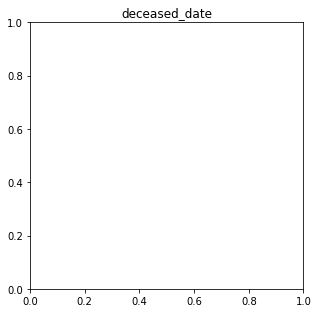

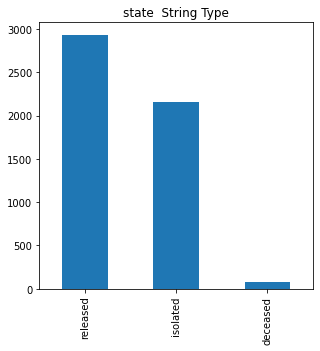

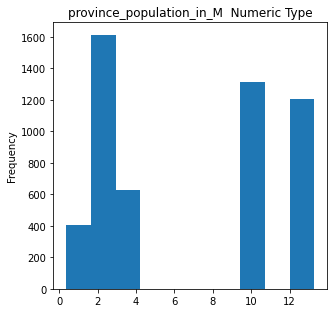

In [16]:
for column in df:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        plt.title(column + '  Numeric Type')
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data
        plt.title(column + "  String Type")
        df[column].value_counts()[:10].plot(kind = 'bar')

<Figure size 432x288 with 0 Axes>